<h1>Содержание<span class="tocSkip"></span></h1>

## Изучение файлов в данных

### Библиотеки

In [1]:
# достаём библиотеки
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# библиотека сиборн для визуализации на Питоне поверх matplotlib
import seaborn as sns

In [2]:
# Импорт библиотеки высокоуровневых математических функций
import numpy as np

In [3]:
# лаконичный, последовательный, высокоуровневый API для создания фигур
import plotly.express as px

In [4]:
import plotly.graph_objects as go

### Настройки

In [5]:
# format вывода значений в виде числа с 10-мя знаками после запятой
# pd.options.display.float_format = '{:,.10f}'.format

In [6]:
# количество отображаемых столбцов
pd.options.display.max_columns = 200

### Вывод и изучение данных

In [7]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    visits_log = pd.read_csv('/datasets/visits_log.csv', sep=',')
except:
    visits_log = pd.read_csv('visits_log.csv', sep=',')
    
display(visits_log.head(5))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [9]:
visits_log.duplicated().sum()

0

In [10]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    orders_log = pd.read_csv('/datasets/orders_log.csv', sep=',')
except:
    orders_log = pd.read_csv('orders_log.csv', sep=',')
    
display(orders_log.head(5))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
orders_log.duplicated().sum()

0

In [13]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    costs = pd.read_csv('/datasets/costs.csv', sep=',')
except:
    costs = pd.read_csv('costs.csv', sep=',')
    
display(costs.head(5))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [15]:
costs.duplicated().sum()

0

### Описание данных

В вашем распоряжении три датасета.
Файл **visits_log.csv** хранит лог сервера с информацией о посещениях сайта, **orders_log.csv** — информацию о заказах, а **costs.csv** — информацию о расходах на маркетинг.

Структура visits_log.csv

    Uid — уникальный идентификатор пользователя,
    Device — категория устройства пользователя,
    Start Ts — дата и время начала сессии,
    End Ts — дата и время окончания сессии,
    Source Id — идентификатор источника перехода на сайт.

Структура orders_log.csv

    Uid — уникальный идентификатор пользователя,
    Buy Ts — дата и время заказа,
    Revenue — сумма заказа.

Структура costs.csv

    source_id — идентификатор рекламного источника,
    dt — дата проведения рекламной кампании,
    costs — расходы на эту кампанию.

### Вывод


Пропущенных значений не отмечено. Работу с ними можно пропустить. Столбцы с датой и временем имеют формат *object*, необходимо привести их к нужному формату. Дубликаты не обнаружены.

## Предобработка данных

### Работа с типами данных

In [16]:
# Приведём столбцы к формату даты и времени
visits_log['Start Ts'] = pd.to_datetime(visits_log['Start Ts'], format="%Y-%m-%d %H:%M")
visits_log['End Ts'] = pd.to_datetime(visits_log['End Ts'], format="%Y-%m-%d %H:%M")

In [17]:
orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'], format="%Y-%m-%d %H:%M")

In [18]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M")

In [19]:
costs['source_id'] = costs['source_id'].astype('int8')

In [20]:
visits_log['Source Id'] = visits_log['Source Id'].astype('int8')

Мы изменили тип данных на нужный

### Вывод

Мы привели столбцы к формату времени, так же уменьшили разрядность в стобцах источников для экономии памяти

## Расчёт продуктовых метрик

### Расчёт WAU, DAU, MAU

In [21]:
# Чтобы посчитать недельное и месячное использование,
# выделим в отдельные столбцы год, месяц и неделю, а также полную дату.
visits_log['session_year']  = visits_log['Start Ts'].dt.year
visits_log['session_month'] = visits_log['Start Ts'].dt.month
visits_log['session_week']  = visits_log['Start Ts'].dt.week
visits_log['session_date'] = visits_log['Start Ts'].dt.date

visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [22]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее:
dau_total = visits_log.groupby('session_date').agg({'Uid': 'nunique'}).mean()

print("Итоговое значение DAU: {:.2f}".format(dau_total['Uid']))

Итоговое значение DAU: 907.99


In [23]:
# создадим сводную таблицу для построения графика
visits_log_dau_total = visits_log.pivot_table(
    index='session_date', values='Uid', aggfunc='nunique')
visits_log_dau_total.head(5)

,Uid,session_date
session_date,,
2017-06-01,605,1
2017-06-02,608,1
2017-06-03,445,1
2017-06-04,476,1
2017-06-05,820,1


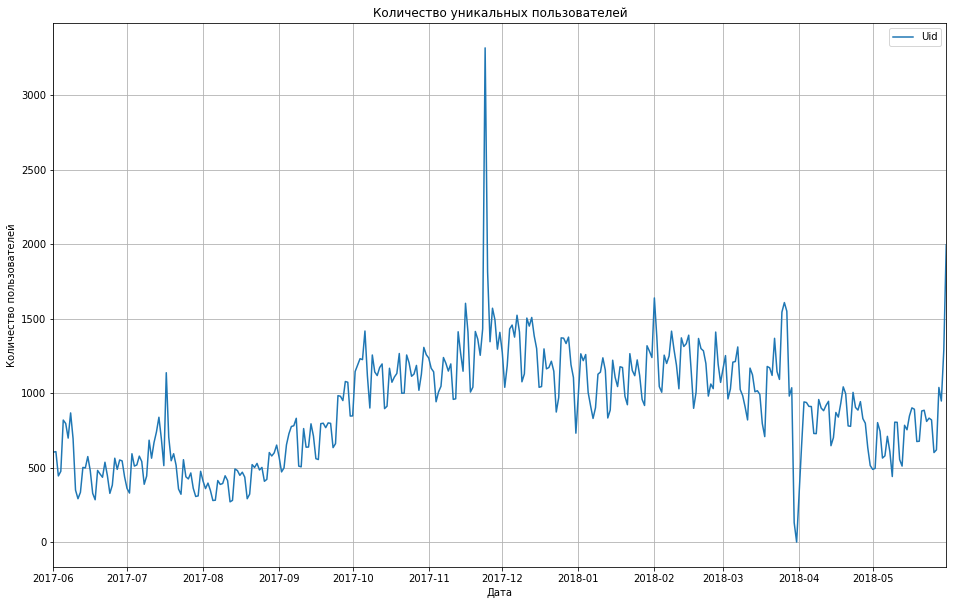

In [24]:
# построим линейный график по уникальным пользователям по дням
visits_log_dau_total.plot(y='Uid',
                        grid=True,
                        style='-',
                        figsize=(16, 10))     
plt.title('Количество уникальных пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.show()

Виден резкий скачок перед новым годом и резкое падени в конце марта

In [25]:
wau_total = (
    visits_log.groupby(['session_year', 'session_week'])
    .agg({'Uid': 'nunique'})
    .mean()
)

In [26]:
print('Итоговое значение WAU: {:.2f}'.format(wau_total['Uid']))

Итоговое значение WAU: 5716.25


In [27]:
# создадим сводную таблицу для построения графика
visits_log_wau_total = visits_log.pivot_table(
    index='session_week', values='Uid', aggfunc='nunique')
visits_log_wau_total.head(5)

,Uid,session_week
session_week,,
1,6918,1
2,6703,1
3,6972,1
4,7060,1
5,8111,1


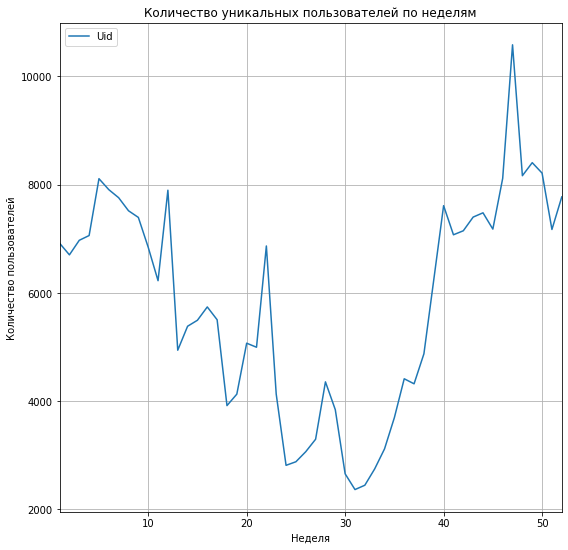

In [28]:
# построим линейный график по уникальным пользователям по неделям
visits_log_wau_total.plot(y='Uid',
                        grid=True,
                        style='-',
                        figsize=(9, 9))     
plt.title('Количество уникальных пользователей по неделям')
plt.ylabel('Количество пользователей')
plt.xlabel('Неделя')
plt.show()

При недельном осмотре видны спад активности пользователе летом и её рост по окончание лета и максимума к окнцу года

In [29]:
mau_total = (
    visits_log.groupby(['session_year', 'session_month'])
    .agg({'Uid': 'nunique'})
    .mean()
)

In [30]:
print('Итоговое значение MAU: {:.2f}'.format(mau_total['Uid']))

Итоговое значение MAU: 23228.42


In [31]:
# создадим сводную таблицу для построения графика
visits_log_mau_total = visits_log.pivot_table(
    index='session_month', values='Uid', aggfunc='nunique')
visits_log_mau_total.head(5)

,Uid,session_month
session_month,,
1,28716,1
2,28749,1
3,27473,1
4,21008,1
5,20701,1


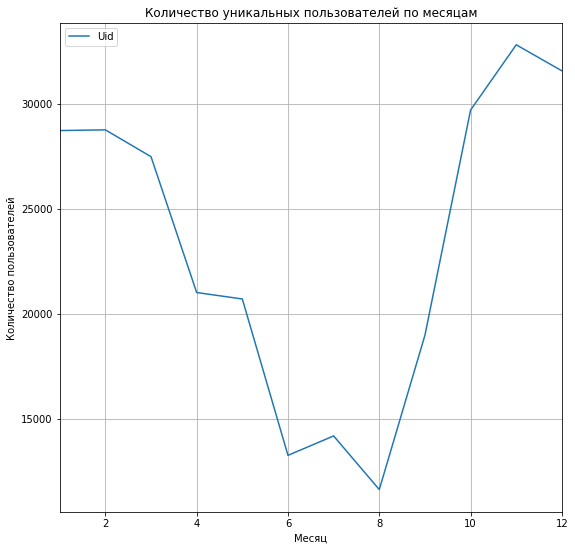

In [32]:
# построим линейный график по уникальным пользователям по неделям
visits_log_mau_total.plot(y='Uid',
                        grid=True,
                        style='-',
                        figsize=(9, 9))     
plt.title('Количество уникальных пользователей по месяцам')
plt.ylabel('Количество пользователей')
plt.xlabel('Месяц')
plt.show()

С июня по август все люди видимо на море и активность пользователей минимальна

### Вывод

Анализ активности пользователей вывел:
- Уникальных пользователей в среднем в день: 907.99
- В неделю 5716.25    
- В месяц 23228.42

Активность резко возрастает перед новым годом. В целом летом активность ниже

###  Определить, сколько раз за день пользователи в среднем заходят на сайт

In [33]:
sessions_per_user = visits_log.groupby('session_date').agg({'Uid': ('count', 'nunique')})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions']/sessions_per_user['n_users'])
sessions_per_user.head()

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [34]:
print('Среднее посещение:{:.2f}'.format(sessions_per_user['sess_per_user'].mean()))

Среднее посещение:1.08


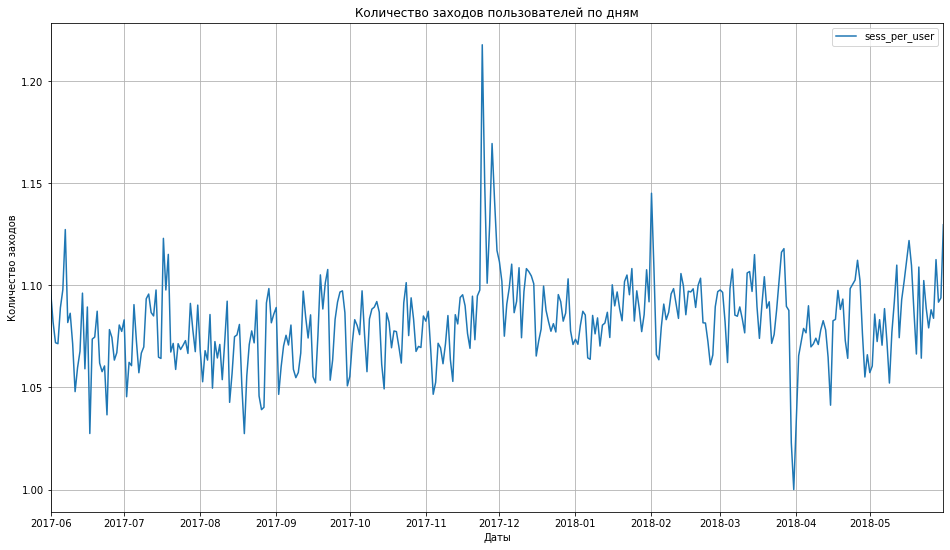

In [35]:
# построим линейный график по уникальным пользователям по неделям
sessions_per_user.plot(y='sess_per_user',
                        grid=True,
                        style='-',
                        figsize=(16, 9))     
plt.title('Количество заходов пользователей по дням')
plt.ylabel('Количество заходов')
plt.xlabel('Даты')
plt.show()

Мы видим рост количества заходов пользователе перед новым годом и спад в конце марта

### Исследуйте, сколько времени пользователи проводят на сайте

In [36]:
# Посчитаем длину сессий и выведем среднее
visits_log['session_duration_sec'] = (
    visits_log['End Ts'] - visits_log['Start Ts']
).dt.seconds
visits_log['session_duration_sec'].mean()

643.506488592098

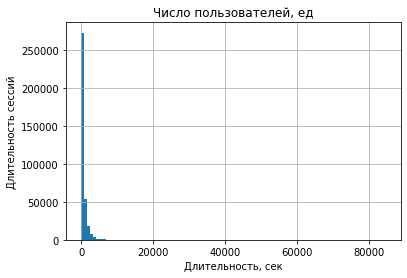

In [37]:
# построим гистрграмму
visits_log['session_duration_sec'].hist(bins=100)
plt.title('Число пользователей, ед')
plt.ylabel('Длительность сессий')
plt.xlabel('Длительность, сек')
plt.show()

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего)

In [38]:
asl = visits_log['session_duration_sec'].mode()[0]
asl

60

Чаще всего сессия пользователей занимает 60 сек. Много это или мало? Тяжело сказать, если пользователи за это время успевают совершить покупку, то всё нормально. Если нет, то что то им мешает

### Рассчитайте Retention Rate, применяя когортный анализ

In [39]:
visits_log.head(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680


In [40]:
# Для каждого клиента получим дату его первого визита и добавим его к таблице
first_visits = visits_log.groupby(['Uid'])['Start Ts'].min()
first_visits.name = 'first_visits'
visits_log = visits_log.join(first_visits, on='Uid')

In [41]:
visits_log.head(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00


In [42]:
# Следующим шагом выделим из столбцов first_activity_date и Start Ts месяцы. 
# Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'. 
# [M] в типе datetime64 означает размерность временной метки, в этом случае — месяц:

visits_log['first_order_month'] = visits_log['first_visits'].astype(
    'datetime64[M]'
)
visits_log['order_month'] = visits_log['Start Ts'].astype('datetime64[M]')
visits_log.head(3)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits,first_order_month,order_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01


In [43]:
# Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты.
# В качестве делителя обратимся к константе np.timedelta64(1,'M'):

visits_log['cohort_lifetime'] = (
    visits_log['order_month'] - visits_log['first_order_month']
)
visits_log['cohort_lifetime'] = visits_log[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype(
    'int'
)

In [44]:
# Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных
# пользователей на определённый «месяц жизни»:

cohorts = visits_log.groupby(['first_order_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

In [45]:
#Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, 
# и на него разделить число пользователей в каждую следующий месяц.
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_order_month', 'Uid']
]
initial_users_count

,first_order_month,Uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [46]:
# Переименуем столбец Uid в cohort_users методом rename() (англ. «переименовать»). 
# Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})

In [47]:
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_order_month')

In [48]:
# Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей 
# в каждый из месяцев на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

In [49]:
cohorts['Uid'].unique()

array([13259,  1043,   713,   814,   909,   947,   809,   766,   694,
         674,   539,   596, 13140,   737,   738,   765,   633,   601,
         510,   376,   361, 10181,   783,   640,   639,   448,   370,
         402,   284,   265, 16704,  1428,  1156,   847,   658,   632,
         599,   404,   381, 25977,  2042,  1357,  1012,   890,   837,
         555,   529, 27248,  2133,  1202,  1054,   919,   638,   594,
       25268,  1410,   960,   786,   512,   481, 22624,  1351,   565,
         458, 22197,  1267,   446, 20589,   861,   557, 15709,   760,
       15273])

In [50]:
cohorts['cohort_users'].unique()

array([13259, 13140, 10181, 16704, 25977, 27248, 25268, 22624, 22197,
       20589, 15709, 15273])

In [51]:
cohorts['retention'].unique()

array([1.        , 0.07866355, 0.05377479, 0.06139226, 0.06855721,
       0.07142318, 0.06101516, 0.05777208, 0.05234181, 0.0508334 ,
       0.04065163, 0.0449506 , 0.05608828, 0.05129376, 0.05616438,
       0.05821918, 0.04817352, 0.04535769, 0.0457382 , 0.03881279,
       0.02861492, 0.02747336, 0.07690797, 0.06286219, 0.06276397,
       0.05009331, 0.04400354, 0.03634221, 0.03948532, 0.0278951 ,
       0.02602888, 0.08548851, 0.06920498, 0.05070642, 0.03939176,
       0.03783525, 0.03585967, 0.02418582, 0.02280891, 0.078608  ,
       0.05223852, 0.03895754, 0.03426108, 0.03222081, 0.02136505,
       0.02036417, 0.07828097, 0.04411333, 0.03868174, 0.03372725,
       0.02341456, 0.02179977, 0.0558018 , 0.03799272, 0.03110654,
       0.02026278, 0.01903593, 0.05971535, 0.03933876, 0.02497348,
       0.02024399, 0.05707979, 0.02545389, 0.02009281, 0.04181845,
       0.02705328, 0.04837991])

In [52]:
# Оставим в данных о месяце первого заказа только год и месяц:
cohorts['first_order_month'] = cohorts[
    'first_order_month'
].dt.strftime('%Y-%m')

In [53]:
# уберём первый месяц жизни, и так понятно, что там 100%
cohorts = cohorts[cohorts['cohort_lifetime'] > 0]

In [54]:
retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

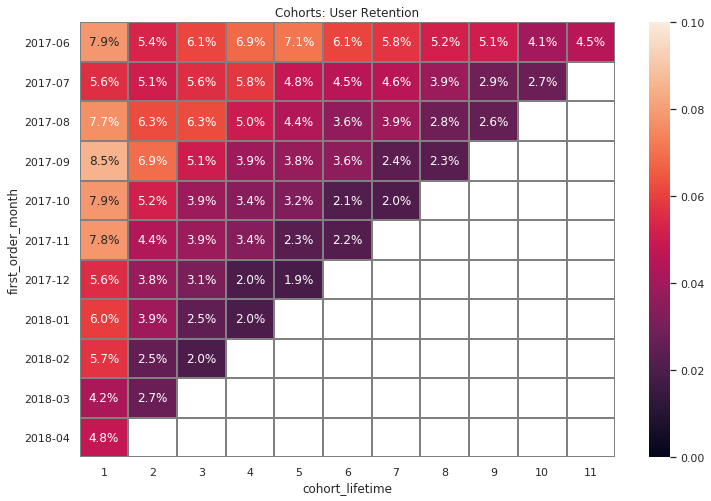

In [55]:
# Создадим тепловую карту

sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True,  fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1);

Самый стабильный RR в первых трёх когортах. На протяжение всего периода он держиться около 5-6%. Есть всплески возвратов пользователей в определенных когортах в разные месяцы. Выделяется подъём возвратов на 8 месяц жизни первой когорты и по диагонали соответственно для других когорт

In [126]:

print("Среднее значение RR за второй месяц жизни: {:.2f}".format(
                        retention_pivot[1].mean()))

Среднее значение RR за второй месяц жизни: 0.07


### Вывод

Активность пользователей ниже летом летом и с начала осени начинает подъём достигая максимума в конце года. RR  средний показатель на второй месяц около 5%. По всем когортам виден спад на март месяц. Максимальный возврат пользователей в сентябрьской когорте на второй месяц жизни - 10,2%, так же в январской на первый месяц - 9% и в июньской на 8 месяц - 8,4%

## Метрики электронной коммерции

### Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [57]:
# Для каждого клиента получим дату его первого заказа и добавим его к таблице
first_order_date = orders_log.groupby(['Uid'])['Buy Ts'].min()
first_order_date.name = 'first_order_date'
orders_log = orders_log.join(first_order_date, on='Uid')

In [58]:
# объединим датафреймы с визитами и покупками по Uid
users = orders_log.merge(visits_log, on='Uid')
users.head(5)

,Buy Ts,Revenue,Uid,first_order_date,Device,End Ts,Source Id,Start Ts,session_year,session_month,session_week,session_date,session_duration_sec,first_visits,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01 00:09:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01 00:14:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01 00:14:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680,2017-06-01 07:31:00,2017-06-01,2017-06-01,0


In [59]:
users['time_first_purchase'] = (users['Buy Ts'] - users['first_visits']).dt.seconds
print('Среднее время до первогозаказа:', users['time_first_purchase'].mean())

Среднее время до первогозаказа: 34290.65485090056


In [60]:
users.head(5)

,Buy Ts,Revenue,Uid,first_order_date,Device,End Ts,Source Id,Start Ts,session_year,session_month,session_week,session_date,session_duration_sec,first_visits,first_order_month,order_month,cohort_lifetime,time_first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01 00:09:00,2017-06-01,2017-06-01,0,60
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01 00:14:00,2017-06-01,2017-06-01,0,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,120
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01 00:14:00,2017-06-01,2017-06-01,0,900
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680,2017-06-01 07:31:00,2017-06-01,2017-06-01,0,1620


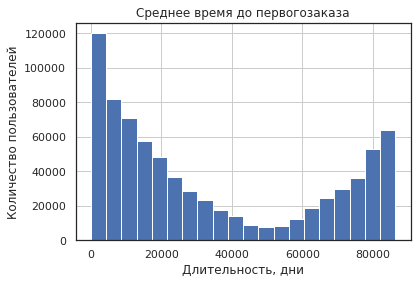

In [61]:
# построим гистрграмму
users['time_first_purchase'].hist(bins=20)
plt.title('Среднее время до первогозаказа')
plt.ylabel('Количество пользователей')
plt.xlabel('Длительность, дни')
plt.show()

In [62]:
time_first_purchase_mean = users['time_first_purchase'].median()
time_first_purchase_mean

21840.0

Сначала мы узнали среднюю величину 31050 сек после перевого захода на сайт к совершению покупки. Построив гистограмму мы увидели нормальное распределение (вроде бы). В конце хвост поднимается, думаю это связано с тем, что люди посмотрели товар в первый раз, ушли готовиться к покупке и только потом купили. Возьму медиану, чтобы отрезать хвосты сильно выдающихся значений. Поэтому в среднем покупатель совершает покупку через 21840 сек после первого захода.

### Рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев

In [63]:
orders_log.head()

,Buy Ts,Revenue,Uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [64]:
average_number_purchases_all = orders_log['Buy Ts'].count() / orders_log['Uid'].nunique()
print("Среднее кол-во покупок на покупателя за весь период: {:.2f}".format(average_number_purchases_all))

Среднее кол-во покупок на покупателя за весь период: 1.38


In [65]:
# Следующим шагом выделим из столбцов first_order_date и Buy Ts месяцы. 
# Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'. 
# [M] в типе datetime64 означает размерность временной метки, в этом случае — месяц:

orders_log['first_order_month'] = orders_log['first_order_date'].astype(
    'datetime64[M]'
)
orders_log['order_month'] = orders_log['Buy Ts'].astype('datetime64[M]')
orders_log.head(3)

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [66]:
# Сгруппируем по когортам и вычеслим число уникальных пользователей и суммарное количество покупок
aver_num_purchases = orders_log.groupby('order_month').agg({'Uid':'nunique', 'Buy Ts':'count'}).reset_index()
aver_num_purchases.head(10)

,order_month,Uid,Buy Ts
0,2017-06-01,2023,2354
1,2017-07-01,1984,2363
2,2017-08-01,1472,1807
3,2017-09-01,2750,3387
4,2017-10-01,4675,5679
5,2017-11-01,4547,5659
6,2017-12-01,4942,6218
7,2018-01-01,3898,4721
8,2018-02-01,4258,5281
9,2018-03-01,4181,5326


In [67]:
# сделаем срез за первые 6 месяцев
aver_num_purchases = aver_num_purchases.loc[0:5]
aver_num_purchases

,order_month,Uid,Buy Ts
0,2017-06-01,2023,2354
1,2017-07-01,1984,2363
2,2017-08-01,1472,1807
3,2017-09-01,2750,3387
4,2017-10-01,4675,5679
5,2017-11-01,4547,5659


In [68]:
average_number_purchases = aver_num_purchases['Buy Ts'].sum() / aver_num_purchases['Uid'].sum()
print("Среднее кол-во покупок на покупателя за первые шесть месяцев: {:.2f}".format(average_number_purchases))

Среднее кол-во покупок на покупателя за первые шесть месяцев: 1.22


Вычислив среднее значение покупок на одного покупателя за шесть месяцев мы получили 1.22. Из этой цифры можно сделать вывод, что примерно только каждый четвертый покупатель вернеться совершать покупки в течение полугода.

### Рассчитайте средний чек, применяя группировку по времени совершения покупки

In [69]:
# Из даты покупки выделим день
orders_log['order_day'] = orders_log['Buy Ts'].astype('datetime64[D]')

In [70]:
orders_log.tail()

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month,order_day
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01 00:02:00,2018-06-01,2018-06-01,2018-06-01


In [71]:
check_df = orders_log.groupby('order_day').agg({'Uid':'count', 'Revenue':'sum'}).reset_index()
check_df.head()

,order_day,Uid,Revenue
0,2017-06-01,96,389.46
1,2017-06-02,111,324.11
2,2017-06-03,67,166.48
3,2017-06-04,66,195.21
4,2017-06-05,161,441.49


In [72]:
check_df['mean_check'] = check_df['Revenue'] / check_df['Uid']
print('Средний чек за весь период: {:.2f}'.format(check_df['mean_check'].mean()))

Средний чек за весь период: 4.94


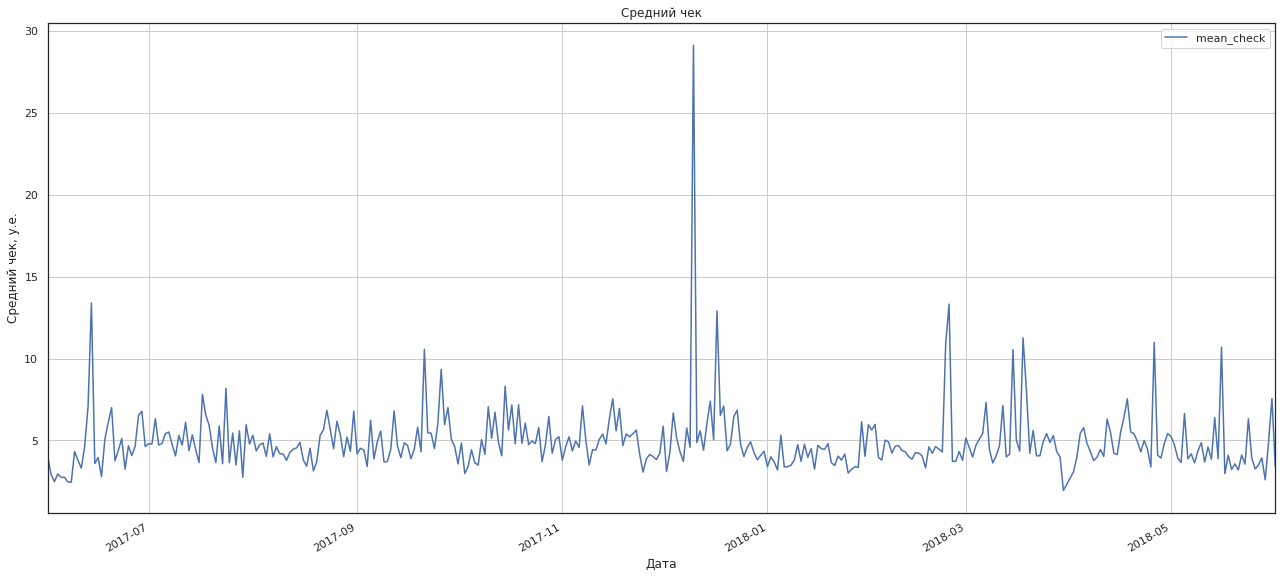

In [73]:
# построим линейный график по среднему чеку
check_df.plot(y='mean_check', x='order_day',
                        grid=True,
                        style='-',
                        figsize=(22, 10))     
plt.title('Средний чек')
plt.ylabel('Средний чек, у.е.')
plt.xlabel('Дата')
plt.show()

Средний чек за весь период: 4.94 у.е. Но он явно не стабилен. Есть явный пик ближе к концу года. Так же есть небольшие пики перед летом (видимо сезон отпусков), начало осени (школа видимо), в конце февраля - начале марта (видимо весна, смена сезона), провал в апреле

### Выясните, как меняется LTV на покупателя по когортам

In [74]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = (
    orders_log.groupby('first_order_month')
    .agg({'Uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head(7))

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340
5        2017-11-01      4081
6        2017-12-01      4383


In [75]:
orders_log.head()

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month,order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


In [76]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 
# Сбросим индекс методом reset_index():
cohorts_ltv = (
    orders_log.groupby(['first_order_month', 'order_month'])
    .agg({'Revenue': 'sum'})
    .reset_index()
)
print(cohorts_ltv.head()) 

  first_order_month order_month  Revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


С точки зрения когортного анализа **LTV** — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу **cohorts_ltv** данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [77]:
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
print(report.head())

  first_order_month  n_buyers order_month  Revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58


**LTV** считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. Так же **LTV** — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [78]:
margin_rate = 1

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

print(report.head())

  first_order_month  n_buyers order_month  Revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4


Наконец, найдём **LTV**. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [135]:
report['ltv'] = (report['gp'] / report['n_buyers']).round(2)

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1)

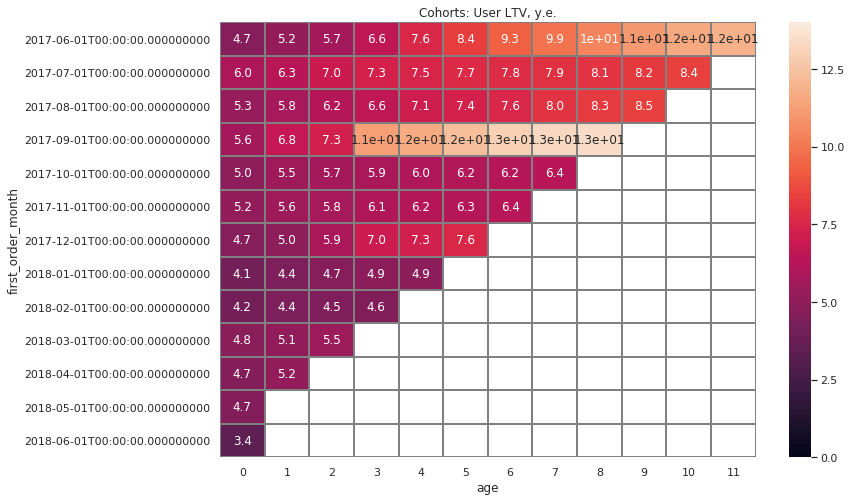

In [136]:
# Создадим тепловую карту

sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User LTV, у.е.')
sns.heatmap(output, annot=True,  fmt='.2', linewidths=1, linecolor='gray', vmin=0, vmax=14);

In [137]:
# Найдём среднее LTV когорт, проживших не менее 6 месяцев
ltv_mean = output[5].mean()

print("Среднее LTV когортб проживших не менее 6 месяцев: {:.2f}".format(ltv_mean))

Среднее LTV когортб проживших не менее 6 месяцев: 7.97


### Вывод

После первого месяца LTV резко падает. Выделяется сентябрьская когорта на 4 месяц жизни, что то было перед новым годом для неё. По другим когортам такого не заметно. 

Средний чек явно не стабилен. Есть явный пик ближе к концу года. Так же есть небольшие пики перед летом (видимо сезон отпусков), начало осени (школа видимо), в конце февраля - начале марта (видимо весна, смена сезона), провал в апреле.

Среднее кол-во покупок на покупателя за первые шесть месяцев: 1.22. Чуть больше каджого пятого покупателя делает повторные заказы. Это соотноситься с LTV, когда он резко падает после первого месяца.

Среднее время от первого визита до первого заказа: 21840 сек, около 6 часов. Хотя много покупателей, кто тратит сильно больше времени

## Маркетинговые метрики

### Общуя сумма расходов на маркетинг. Как траты распределены по источникам

In [82]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [83]:
costs['first_order_month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,first_order_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [84]:
costs_source = costs.groupby(['source_id', 'first_order_month']).agg({'costs': 'sum'})
costs_source.head(8)

costs
source_id first_order_month         
1         2017-06-01         1125.61
          2017-07-01         1072.88
          2017-08-01          951.81
          2017-09-01         1502.01
          2017-10-01         2315.75
          2017-11-01         2445.16
          2017-12-01         2341.20
          2018-01-01         2186.18

Больше всего трат затрачено на третий источник. Самые маленькие траты пришлись 9 и 10 источник

In [85]:
costs_dt = costs.groupby('first_order_month').agg({'costs': 'sum'})
costs_dt.head()

,costs
first_order_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


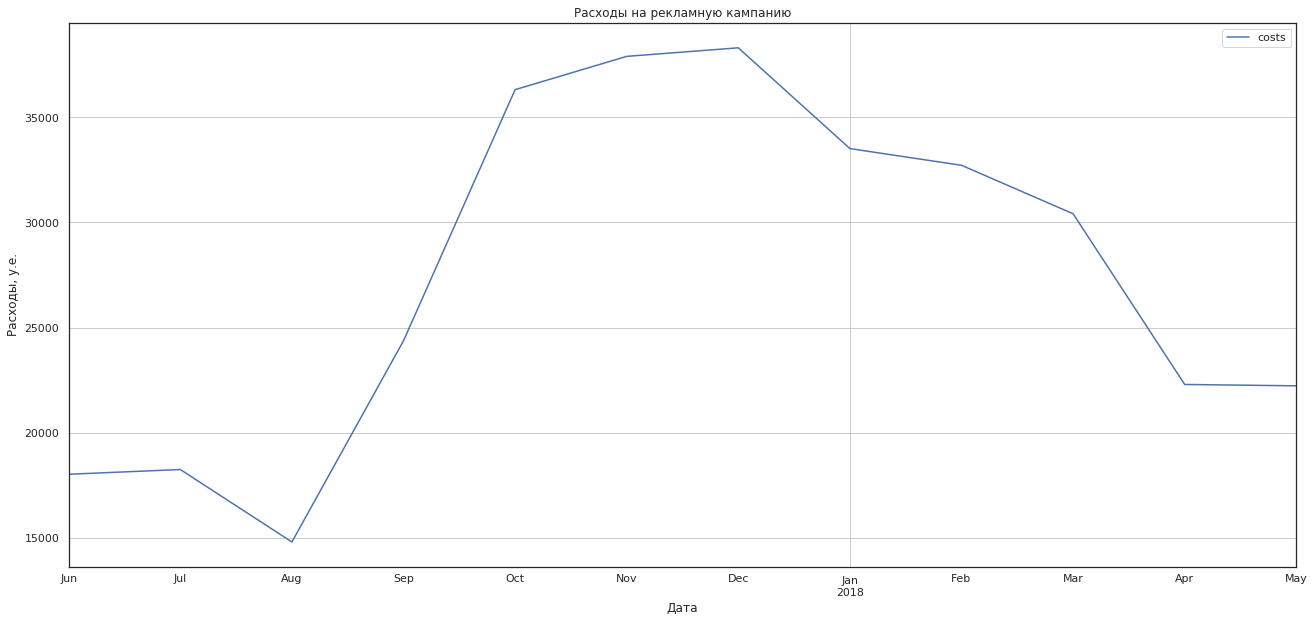

In [86]:
# построим линейный график по расходам на рекламную кампанию
costs_dt.plot(y='costs',
                grid=True,
                style='-',
                figsize=(22, 10))     
plt.title('Расходы на рекламную кампанию')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Дата')
plt.show()

In [87]:
# создадим сводную таблицу по источникам
advertising_by_sources = costs_source.pivot_table(index=['first_order_month'],
                                        columns='source_id', values='costs')
advertising_by_sources.head(5)

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


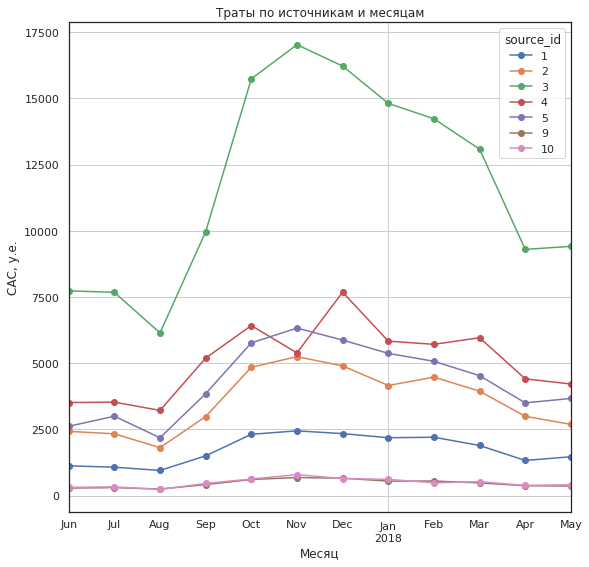

In [88]:
# построим гистограмму для рекламы по источникам:
advertising_by_sources.plot(y=[1, 2, 3, 4, 5, 9, 10],
                               grid=True,
                               style='-o',
                               figsize=(9, 9))
plt.title('Траты по источникам и месяцам')
plt.ylabel('CAC, у.е.')
plt.xlabel('Месяц')
plt.show()

Максимальные траты на рекламу отмечаются в конце года. В среднем с сентября по апреля траты выше, чем в другие месяцы. Если сравнить график общих затрат и раздельно по источником, то больше всего траты на всю рекламу зависят от третьего

### Средний CAC на одного покупателя для всего проекта и для каждого источника трафика.

In [89]:
costs['first_order_month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,first_order_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [90]:
# Просуммируем траты по месяцам
costs_new = costs.groupby('first_order_month').agg({'costs':'sum'})
costs_new.head()

,costs
first_order_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [91]:
# Добавим новых пользователей в тратам на рекламу
costs_new = costs_new.merge(cohort_sizes, on='first_order_month')
costs_new.head()

,first_order_month,costs,n_buyers
0,2017-06-01,18015.00,2023
1,2017-07-01,18240.59,1923
2,2017-08-01,14790.54,1370
3,2017-09-01,24368.91,2581
4,2017-10-01,36322.88,4340


In [92]:
# Поделим затраты на новых покупателей
costs_new['cac_total'] = costs_new['costs'] / costs_new['n_buyers']
costs_new.head()

,first_order_month,costs,n_buyers,cac_total
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


In [93]:
print('Средний CAC для всего проекта:{:.2f}'.format(costs_new['cac_total'].mean()))

Средний CAC для всего проекта:9.15


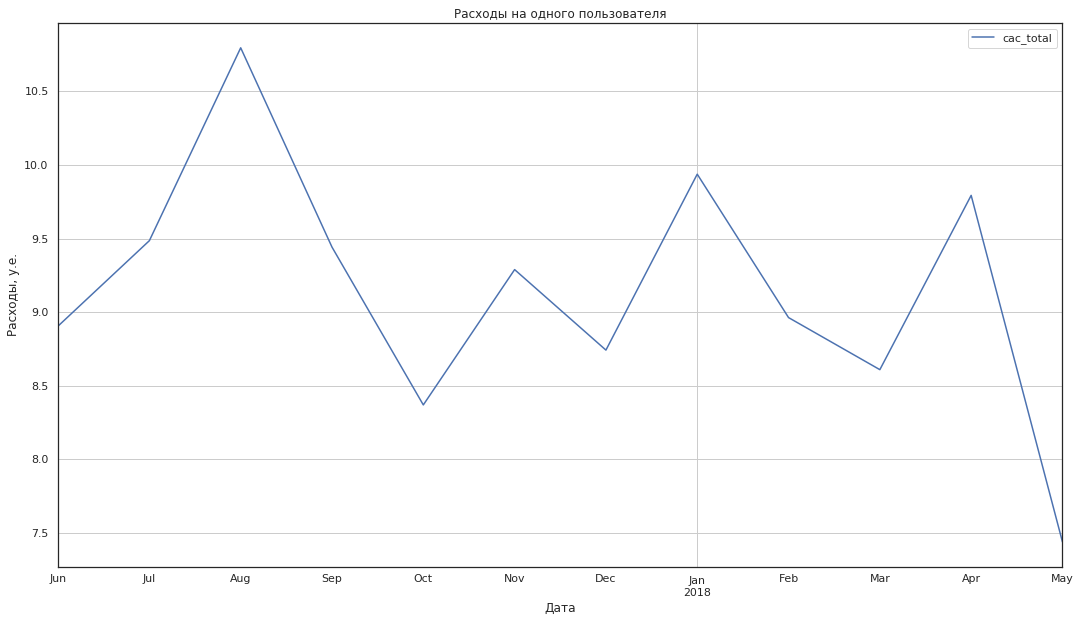

In [94]:
# построим линейный график по расходам на рекламную кампанию
costs_new.plot(y='cac_total', x='first_order_month',
                grid=True,
                style='-',
                figsize=(18, 10))     
plt.title('Расходы на одного пользователя')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Дата')
plt.show()

Дороже всего привлечение новых покупателей было в августе. Дешевле всего в октябре и сильное снижение после апреля.

In [95]:
costs_source.head(8)

costs
source_id first_order_month         
1         2017-06-01         1125.61
          2017-07-01         1072.88
          2017-08-01          951.81
          2017-09-01         1502.01
          2017-10-01         2315.75
          2017-11-01         2445.16
          2017-12-01         2341.20
          2018-01-01         2186.18

In [96]:
costs.head()

,source_id,dt,costs,first_order_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [97]:
# приведем столбец к нижнему регистру. Надо было это ещё раньше сделать
visits_log = visits_log.rename(columns={'Source Id':'source_id'})

In [98]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [99]:
visits_log_selection = visits_log[['first_visits', 'Uid', 'source_id']]

visits_log_selection.drop_duplicates(inplace=True)
visits_log_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277870 entries, 0 to 358531
Data columns (total 3 columns):
first_visits    277870 non-null datetime64[ns]
Uid             277870 non-null uint64
source_id       277870 non-null int8
dtypes: datetime64[ns](1), int8(1), uint64(1)
memory usage: 6.6 MB


In [100]:
orders_log_visits_log_selection = orders_log.merge(visits_log_selection, on='Uid', how='left')
orders_log_visits_log_selection.drop_duplicates(inplace=True)

In [101]:
orders_log_visits_log_selection

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month,order_day,first_visits,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:31:00,3
...,...,...,...,...,...,...,...,...,...
100149,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,2018-05-31,2018-05-31 23:52:00,3
100150,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31,2017-10-23 12:32:00,4
100151,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31,2017-10-23 12:32:00,5
100152,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31,2017-10-23 12:32:00,3


In [102]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц по каждому источнику:
cohort_sizes_2 = (
    orders_log_visits_log_selection.groupby(['source_id','first_order_month'])
    .agg({'Uid': 'nunique'})
    .reset_index()
)
cohort_sizes_2.columns = ['source_id', 'first_order_month', 'n_buyers']
print(cohort_sizes_2.head(15))

    source_id first_order_month  n_buyers
0           1        2017-06-01       401
1           1        2017-07-01       400
2           1        2017-08-01       288
3           1        2017-09-01       526
4           1        2017-10-01       833
5           1        2017-11-01       944
6           1        2017-12-01       903
7           1        2018-01-01       638
8           1        2018-02-01       646
9           1        2018-03-01       676
10          1        2018-04-01       391
11          1        2018-05-01       492
12          2        2017-06-01       457
13          2        2017-07-01       432
14          2        2017-08-01       283


In [103]:
costs.head()

,source_id,dt,costs,first_order_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [104]:
# Посчитаем количество траты за каждый месяц по каждому источнику:
costs_source = (
    costs.groupby(['source_id','first_order_month'])
    .agg({'costs': 'sum'})
    .reset_index()
)
costs_source.columns = ['source_id', 'first_order_month', 'costs_month']
print(costs_source.head(15))

    source_id first_order_month  costs_month
0           1        2017-06-01      1125.61
1           1        2017-07-01      1072.88
2           1        2017-08-01       951.81
3           1        2017-09-01      1502.01
4           1        2017-10-01      2315.75
5           1        2017-11-01      2445.16
6           1        2017-12-01      2341.20
7           1        2018-01-01      2186.18
8           1        2018-02-01      2204.48
9           1        2018-03-01      1893.09
10          1        2018-04-01      1327.49
11          1        2018-05-01      1467.61
12          2        2017-06-01      2427.38
13          2        2017-07-01      2333.11
14          2        2017-08-01      1811.05


In [105]:
# объединим полученные таблицы
costs_source_month_n_buyers = cohort_sizes_2.merge(costs_source, on=['source_id', 'first_order_month'])
costs_source_month_n_buyers.head(15)

,source_id,first_order_month,n_buyers,costs_month
0,1,2017-06-01,401,1125.61
1,1,2017-07-01,400,1072.88
2,1,2017-08-01,288,951.81
3,1,2017-09-01,526,1502.01
4,1,2017-10-01,833,2315.75
5,1,2017-11-01,944,2445.16
6,1,2017-12-01,903,2341.20
7,1,2018-01-01,638,2186.18
8,1,2018-02-01,646,2204.48
9,1,2018-03-01,676,1893.09


In [106]:
costs_source_month_n_buyers['cac'] = costs_source_month_n_buyers['costs_month'] / costs_source_month_n_buyers['n_buyers']
costs_source_month_n_buyers.head()

,source_id,first_order_month,n_buyers,costs_month,cac
0,1,2017-06-01,401,1125.61,2.807007
1,1,2017-07-01,400,1072.88,2.682200
2,1,2017-08-01,288,951.81,3.304896
3,1,2017-09-01,526,1502.01,2.855532
4,1,2017-10-01,833,2315.75,2.780012


In [107]:
# создадим сводную таблицу по источникам
cac_platform = costs_source_month_n_buyers.pivot_table(index=['first_order_month'],
                                        columns='source_id', values='cac')
cac_platform.head(5)

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,2.807007,5.311554,8.846281,5.457764,4.581646,1.550109,2.618500
2017-07-01,2.682200,5.400718,10.733385,4.802354,5.005242,1.939359,4.645352
2017-08-01,3.304896,6.399470,12.512301,6.447615,4.719827,1.555812,4.153036
2017-09-01,2.855532,5.529000,9.663967,5.743650,4.465360,1.872162,4.187909
2017-10-01,2.780012,5.646853,9.702367,3.794823,4.304030,1.599501,2.421776


In [108]:
print(cac_platform.columns.tolist())

[1, 2, 3, 4, 5, 9, 10]


Text(0.5, 0, 'Месяц')

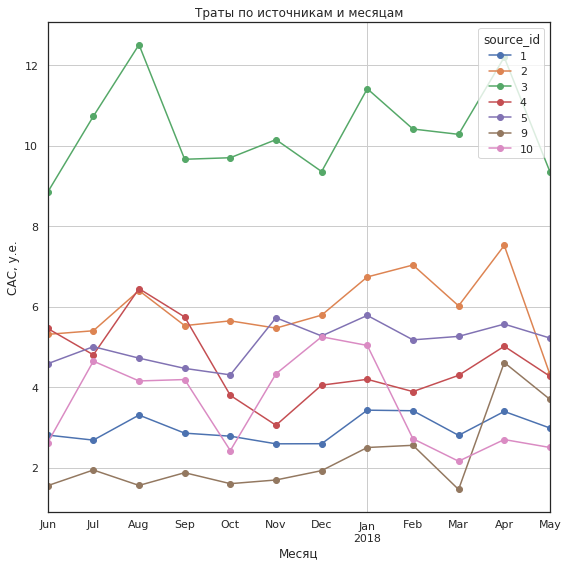

In [109]:
# построим гистограмму для источников
cac_platform.plot(y=[1, 2, 3, 4, 5, 9, 10],
                               grid=True,
                               style='-o',
                               figsize=(9, 9))
plt.title('Траты по источникам и месяцам')
plt.ylabel('CAC, у.е.')
plt.xlabel('Месяц')

Самый дорогой источник привлечения 3. Самый дешевый 9, но весной он становиться дороже 1 и 10

###  ROMI по когортам в разрезе источников

In [110]:
costs_source_month_n_buyers.head()

,source_id,first_order_month,n_buyers,costs_month,cac
0,1,2017-06-01,401,1125.61,2.807007
1,1,2017-07-01,400,1072.88,2.682200
2,1,2017-08-01,288,951.81,3.304896
3,1,2017-09-01,526,1502.01,2.855532
4,1,2017-10-01,833,2315.75,2.780012


In [111]:
visits_log.head()

,Device,End Ts,source_id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits,first_order_month,order_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [112]:
orders_log_visits_log_selection

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month,order_day,first_visits,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:31:00,3
...,...,...,...,...,...,...,...,...,...
100149,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,2018-05-31,2018-05-31 23:52:00,3
100150,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31,2017-10-23 12:32:00,4
100151,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31,2017-10-23 12:32:00,5
100152,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2018-05-31,2017-10-23 12:32:00,3


In [113]:
orders_visits = (
    orders_log_visits_log_selection.groupby(
    ['source_id', 'first_order_month', 'order_month'])
    .agg({'Revenue':'sum'})
    .reset_index()
    )

In [114]:
orders_visits

,source_id,first_order_month,order_month,Revenue
0,1,2017-06-01,2017-06-01,2563.84
1,1,2017-06-01,2017-07-01,881.60
2,1,2017-06-01,2017-08-01,755.03
3,1,2017-06-01,2017-09-01,1783.91
4,1,2017-06-01,2017-10-01,1884.06
...,...,...,...,...
541,10,2018-03-01,2018-04-01,14.23
542,10,2018-03-01,2018-05-01,14.79
543,10,2018-04-01,2018-04-01,387.00
544,10,2018-04-01,2018-05-01,18.45


In [115]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_2 = (
    orders_log_visits_log_selection.groupby(['first_order_month', 'source_id'])
    .agg({'Uid': 'nunique'})
    .reset_index()
)
cohort_sizes_2.columns = ['first_order_month', 'source_id', 'n_buyers']
print(cohort_sizes_2)

   first_order_month  source_id  n_buyers
0         2017-06-01          1       401
1         2017-06-01          2       457
2         2017-06-01          3       874
3         2017-06-01          4       644
4         2017-06-01          5       571
..               ...        ...       ...
81        2018-05-01          4       987
82        2018-05-01          5       703
83        2018-05-01          9        98
84        2018-05-01         10       164
85        2018-06-01          4         1

[86 rows x 3 columns]


In [116]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 
# Сбросим индекс методом reset_index():
cohorts_ltv_2 = (
    orders_log_visits_log_selection.groupby(['first_order_month', 'order_month', 'source_id'])
    .agg({'Revenue': 'sum'})
    .reset_index()
)
print(cohorts_ltv_2) 

    first_order_month order_month  source_id  Revenue
0          2017-06-01  2017-06-01          1  2563.84
1          2017-06-01  2017-06-01          2  3161.11
2          2017-06-01  2017-06-01          3  4165.12
3          2017-06-01  2017-06-01          4  3958.09
4          2017-06-01  2017-06-01          5  3162.01
..                ...         ...        ...      ...
541        2018-05-01  2018-05-01          4  4683.23
542        2018-05-01  2018-05-01          5  3082.50
543        2018-05-01  2018-05-01          9   378.29
544        2018-05-01  2018-05-01         10   607.81
545        2018-06-01  2018-06-01          4     3.42

[546 rows x 4 columns]


С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts_ltv_2 данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [117]:
report_2 = pd.merge(cohort_sizes_2, cohorts_ltv_2, on=['first_order_month', 'source_id'])
print(report_2.head())

  first_order_month  source_id  n_buyers order_month  Revenue
0        2017-06-01          1       401  2017-06-01  2563.84
1        2017-06-01          1       401  2017-07-01   881.60
2        2017-06-01          1       401  2017-08-01   755.03
3        2017-06-01          1       401  2017-09-01  1783.91
4        2017-06-01          1       401  2017-10-01  1884.06


**LTV** считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. Так же **LTV** — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [118]:
margin_rate = 1

report_2['gp'] = report_2['Revenue'] * margin_rate
report_2['age'] = (
    report_2['order_month'] - report_2['first_order_month']
) / np.timedelta64(1, 'M')
report_2['age'] = report_2['age'].round().astype('int')

print(report_2.head())

  first_order_month  source_id  n_buyers order_month  Revenue       gp  age
0        2017-06-01          1       401  2017-06-01  2563.84  2563.84    0
1        2017-06-01          1       401  2017-07-01   881.60   881.60    1
2        2017-06-01          1       401  2017-08-01   755.03   755.03    2
3        2017-06-01          1       401  2017-09-01  1783.91  1783.91    3
4        2017-06-01          1       401  2017-10-01  1884.06  1884.06    4


In [119]:
# наконец найдём LTV
report_2['ltv'] = report_2['gp'] / report_2['n_buyers']
report_2

,first_order_month,source_id,n_buyers,order_month,Revenue,gp,age,ltv
0,2017-06-01,1,401,2017-06-01,2563.84,2563.84,0,6.393616
1,2017-06-01,1,401,2017-07-01,881.60,881.60,1,2.198504
2,2017-06-01,1,401,2017-08-01,755.03,755.03,2,1.882868
3,2017-06-01,1,401,2017-09-01,1783.91,1783.91,3,4.448653
4,2017-06-01,1,401,2017-10-01,1884.06,1884.06,4,4.698404
...,...,...,...,...,...,...,...,...
541,2018-05-01,4,987,2018-05-01,4683.23,4683.23,0,4.744914
542,2018-05-01,5,703,2018-05-01,3082.50,3082.50,0,4.384780
543,2018-05-01,9,98,2018-05-01,378.29,378.29,0,3.860102
544,2018-05-01,10,164,2018-05-01,607.81,607.81,0,3.706159


In [120]:
costs_source_month_n_buyers

,source_id,first_order_month,n_buyers,costs_month,cac
0,1,2017-06-01,401,1125.61,2.807007
1,1,2017-07-01,400,1072.88,2.682200
2,1,2017-08-01,288,951.81,3.304896
3,1,2017-09-01,526,1502.01,2.855532
4,1,2017-10-01,833,2315.75,2.780012
...,...,...,...,...,...
79,10,2018-01-01,122,614.35,5.035656
80,10,2018-02-01,177,480.88,2.716836
81,10,2018-03-01,244,526.41,2.157418
82,10,2018-04-01,144,388.25,2.696181


In [121]:
report_2 = report_2.merge(costs_source_month_n_buyers, on=['source_id', 'first_order_month'])
report_2

,first_order_month,source_id,n_buyers_x,order_month,Revenue,gp,age,ltv,n_buyers_y,costs_month,cac
0,2017-06-01,1,401,2017-06-01,2563.84,2563.84,0,6.393616,401,1125.61,2.807007
1,2017-06-01,1,401,2017-07-01,881.60,881.60,1,2.198504,401,1125.61,2.807007
2,2017-06-01,1,401,2017-08-01,755.03,755.03,2,1.882868,401,1125.61,2.807007
3,2017-06-01,1,401,2017-09-01,1783.91,1783.91,3,4.448653,401,1125.61,2.807007
4,2017-06-01,1,401,2017-10-01,1884.06,1884.06,4,4.698404,401,1125.61,2.807007
...,...,...,...,...,...,...,...,...,...,...,...
539,2018-05-01,3,1006,2018-05-01,4632.27,4632.27,0,4.604642,1006,9411.42,9.355288
540,2018-05-01,4,987,2018-05-01,4683.23,4683.23,0,4.744914,987,4214.21,4.269716
541,2018-05-01,5,703,2018-05-01,3082.50,3082.50,0,4.384780,703,3669.56,5.219858
542,2018-05-01,9,98,2018-05-01,378.29,378.29,0,3.860102,98,362.17,3.695612


Чтобы посчитать накопительный ROMI, вызовем метод cumsum() (от англ. cumulative sum, «накапливаемая сумма»). Он последовательно складывает элементы множества. Например, pd.Series([1, 2, 3]).cumsum() вернёт серию из 3 элементов: 1, 3 и 6. Каждое значение равно сумме предыдущих: 1, 3 = 1+2, 6 = 1+2+3

In [122]:
report_2['romi'] = report_2['ltv'] / report_2['cac']

In [123]:
# Оставим в данных о месяце первого заказа только год и месяц:
report_2['first_order_month'] = report_2[
    'first_order_month'
].dt.strftime('%Y-%m')

In [124]:
output_2 = report_2.pivot_table(
    index='source_id', columns='age', values='romi', aggfunc='mean'
)

output_2 = output_2.cumsum(axis=1).round(2) 

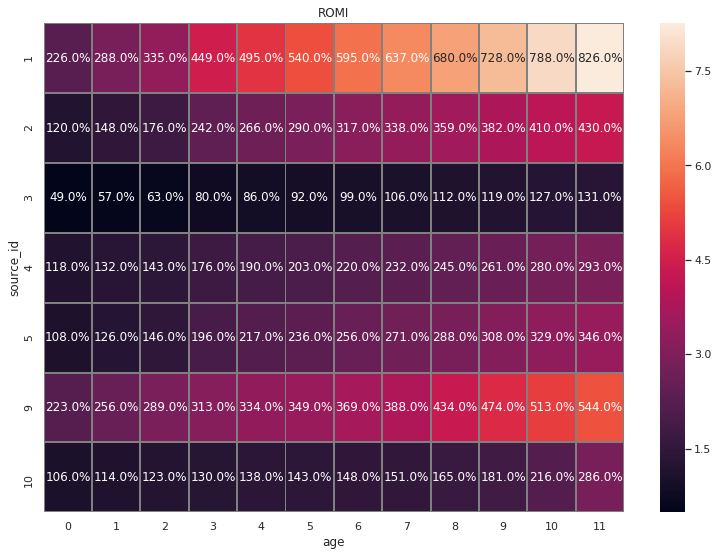

In [125]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output_2, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

### Выводы

Если я правильно считал, то почти все источники окупаются в первый месяц, кроме 3, самого дорогого. Третий источник даст прибыль только к 7 месяцу. Самые прибыльные у нас первый, 9, и второй источники.

## Выводы и рекомендации

### Определите источники трафика, на которые маркетологам стоит делать упор.

Согласно ROMI почти все источники окупаются в первый месяц, кроме 3. Самые прибыльные 1, 2 и 9 - за год окупаемость составит больше 400% для каждого. Упор стоит больше делать на 1 и 9, т.к. согласно общим тратам и CAC второй источник хоть и приносит большую прибыль, но по общим затратам в два раза дороже 1 и 9.

### Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;

Анализ активности пользователей вывел:
- Уникальных пользователей в среднем в день: 907.99
- В неделю 5716.25    
- В месяц 23228.42

Активность резко возрастает перед новым годом. В целом летом активность ниже

- Среднее посещение:1.08
- Чаще всего сессия пользователей занимает 60 сек

Активность пользователей ниже летом летом и с начала осени начинает подъём достигая максимума в конце года. RR  средний показатель на второй месяц около 5%

- в среднем покупатель совершает покупку через 21840 сек после первого захода.
- Средний чек за весь период: 4.94 Но он явно не стабилен. Есть явный пик ближе к концу года. Так же есть небольшие пики перед летом (видимо сезон отпусков), начало осени (школа видимо), в конце февраля - начале марта (видимо весна, смена сезона), провал в апреле

Среднее кол-во покупок на покупателя за первые шесть месяцев: 1.22. Чуть больше каджого пятого покупателя делает повторные заказы. Это соотноситься с LTV, когда он резко падает после первого месяца.

Самые выгодные источники 1,2 и 9. Самый бесполезный и дорогой - 3

### Подведите итоги когортного анализа

После исследования выяснилось, что покупатели редко возвращаются, в среднем около 5%. Но стабильно. Если в первый месяц источник рекламы принёс мало клиентов, не стоит ждать от него большой итоговой прибыли через время. Лучшее время для рекламных кампани - это окончание летнего сезона и предновогодние праздники. В это время пользователи более активны и средний чек выше, так же уже далее людей, повторно совершающих покупки будет больше